In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import mapclassify
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xlrd
usa = gpd.read_file('maps/USA_States/USA_States.shp')
usa = usa[(usa['STATE_ABBR'] != 'AK') & (usa['STATE_ABBR'] != 'HI')]
file = '/Users/rpsmithii/Dropbox/Hedge Trackers/marketing/data/AFPfiltered.xlsx'
df = pd.read_excel(file)
df = df.rename(columns={'State': 'STATE_ABBR'})
n = df.shape[0]
n
#df.info()
box = 'Filtered by\n- practioners only\n- less than $20B in revenue\n- treasury or controller functions\n- VP, DIR, Oficer Level Only\n- customers and inflight optys removed\nn = ' + str(n)

In [48]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 359 entries, 0 to 358
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   First Name  359 non-null    object
 1   Last Name   359 non-null    object
 2   Company     359 non-null    object
 3   Job Title   359 non-null    object
 4   Address     359 non-null    object
 5   City        359 non-null    object
 6   STATE_ABBR  355 non-null    object
 7   Zip         358 non-null    object
 8   Country     359 non-null    object
 9   Rev         359 non-null    int64 
 10  Revenue     359 non-null    object
 11  Department  359 non-null    object
 12  Level       359 non-null    object
 13  Industry    359 non-null    object
dtypes: int64(1), object(13)
memory usage: 39.4+ KB


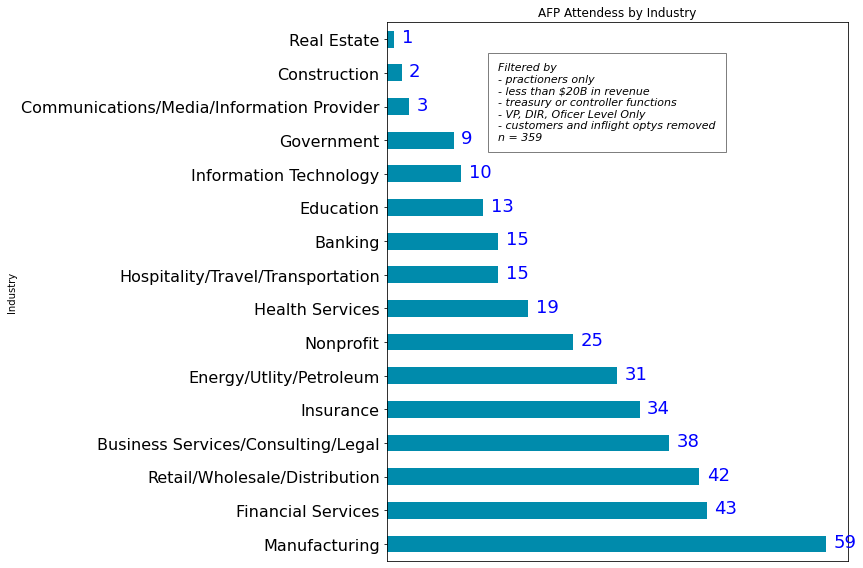

In [64]:
# BY INDUSTRY

ind_df = df['Industry'].value_counts(dropna=True, sort=True)
ind_df = pd.DataFrame(ind_df)
ind_df = ind_df.reset_index()
ind_df.columns = ['Industry', 'Attendees']
# ind_df.info()

title = 'AFP Attendess by Industry'

ax = ind_df.plot.barh(x='Industry', 
                       y='Attendees',
                       rot = 0,
                       legend = False,
                       fontsize = '16',
                       figsize=(12,8),
                       title = title,
                       color= '#008bac')

ax.tick_params(
            axis = 'x',          # changes apply to the x-axis
            which = 'both',      # both major and minor ticks are affected
            bottom = False,      # ticks along the bottom edge are off
            top = False,         # ticks along the top edge are off
            labelbottom = False
     ) 

# ax.set_yticklabels(ind_df['Industry'],fontsize = 18, wrap = True)

ax.text(15, 12, box, fontsize = '11', style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

for i, v in enumerate(ind_df['Attendees']):
    plt.text(v + 1, i - 0.1, str(v), color = 'blue', fontweight = 'regular', fontsize = '18')

plt.tight_layout()

ax.figure.savefig('afp_Industry.png', dpi=96)

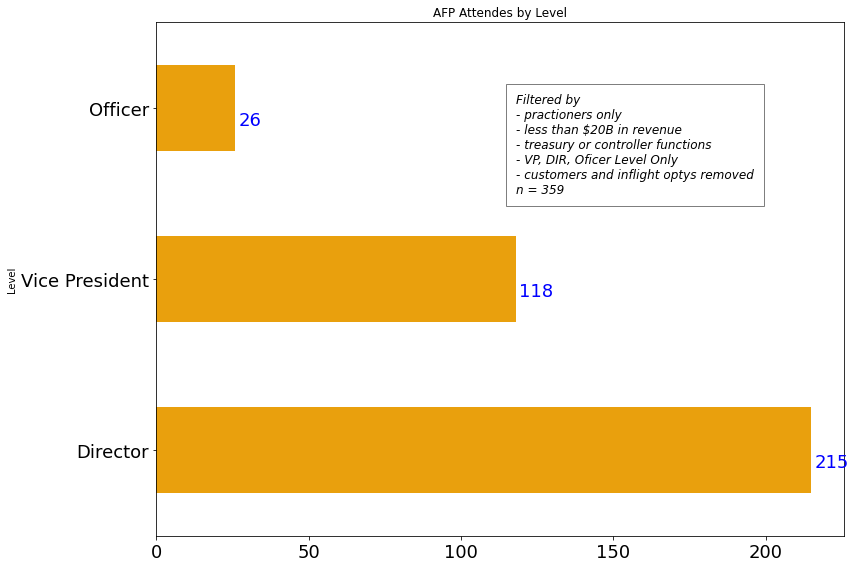

In [67]:
# BY LEVEL

levl_df = df['Level'].value_counts(dropna=True, sort=True)
levl_df = pd.DataFrame(levl_df)
levl_df = levl_df.reset_index()
levl_df.columns = ['Level', 'Attendees']
# levl_df.info()

title = 'AFP Attendes by Level'
ax = levl_df.plot.barh(x='Level', 
                       y='Attendees', 
                       rot = 0,
                       legend = False,
                       fontsize = '18',
                       figsize=(12,8),
                       title = title,
                       color= '#e9a00d')

ax.text(118, 1.5, box, fontsize = '12', style='italic', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

for i, v in enumerate(levl_df['Attendees']):
    plt.text(v + 1, i - 0.1, str(v), color = 'blue', fontweight = 'regular', fontsize = '18')

plt.tight_layout()

ax.figure.savefig('afp_Level.png', dpi=96)

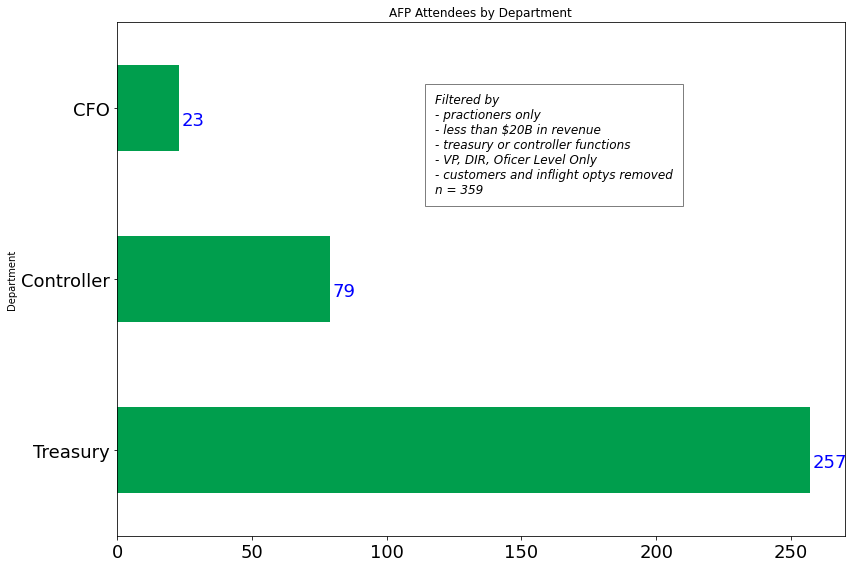

In [69]:
# BY DEPARTMENT

dept_df = df['Department'].value_counts(dropna=True, sort=True)
dept_df = pd.DataFrame(dept_df)
dept_df = dept_df.reset_index()
dept_df.columns = ['Department', 'Attendees']
#dept_df.info()

title = 'AFP Attendees by Department'
ax = dept_df.plot.barh(x='Department', 
                       y='Attendees', 
                       rot = 0,
                       legend = False,
                       fontsize = '18',
                       figsize=(12,8),
                       color = '#009e4d',
                       title = title)

ax.text(118, 1.5, box, fontsize = '12', style='italic', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})
for i, v in enumerate(dept_df['Attendees']):
    plt.text(v + 1, i - 0.1, str(v), color = 'blue', fontweight = 'regular', fontsize = '18')

plt.tight_layout()

ax.figure.savefig('afp_Department.png', dpi=96)

&lt;Figure size 432x288 with 0 Axes&gt;

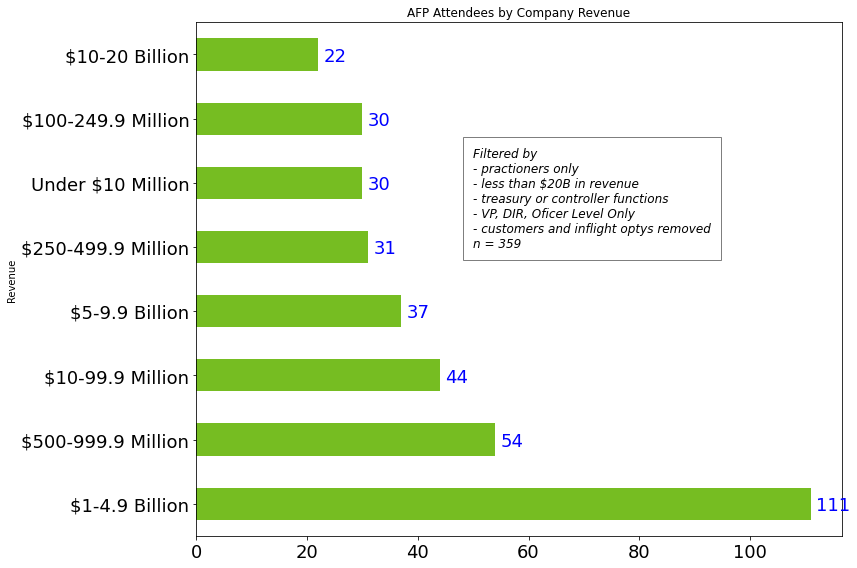

In [73]:
# BY REVENUE

rev_df = df['Revenue'].value_counts(dropna=True, sort=True)
rev_df = pd.DataFrame(rev_df)
rev_df = rev_df.reset_index()
rev_df.columns = ['Revenue', 'Attendees']
#dept_df.info()

plt.tight_layout()
title = 'AFP Attendees by Company Revenue'
ax = rev_df.plot.barh(x='Revenue', 
                       y='Attendees', 
                       rot = 0,
                       legend = False,
                       fontsize = '18',
                       figsize=(12,8),
                       color = '#76BD22',
                       title = title)

ax.text(50, 4, box, fontsize = '12', style='italic', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})
for i, v in enumerate(rev_df['Attendees']):
    plt.text(v + 1, i - 0.1, str(v), color = 'blue', fontweight = 'regular', fontsize = '18')

plt.tight_layout()

ax.figure.savefig('afp_Revenue.png', dpi=96)

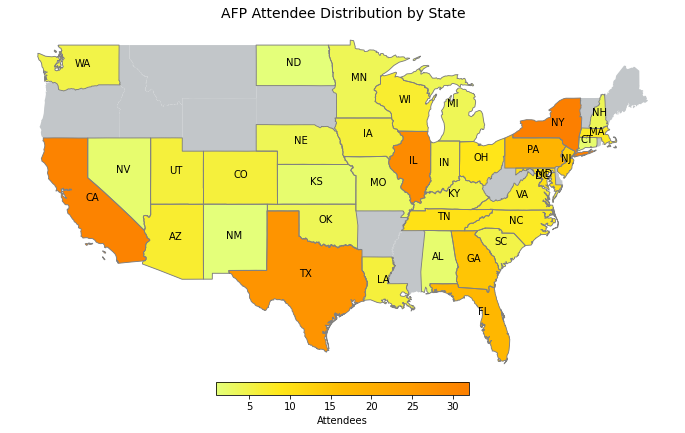

In [43]:
# ATTENDEE STATE DISTRIBUTION

value_counts = df['STATE_ABBR'].value_counts(dropna = False, sort = True)
state_df = pd.DataFrame(value_counts)
state_df = state_df.reset_index()
state_df.columns = ['STATE_ABBR', 'Attendees']
state_df.head(2)

# Add Attendees / State to Geo df
usa_gdf = usa.merge(state_df, on='STATE_ABBR')
usa_gdf.head(2)

title = 'AFP Attendee Distribution by State'
fig, ax = plt.subplots(1, figsize=(12,8))
ax.set_axis_off()
plt.tight_layout()
ax.set_title(title, size = '14', fontweight = '1')
divider = make_axes_locatable(ax)
usa.plot(ax = ax, color='#c2c6c9')
usa_gdf.apply(lambda x: ax.annotate(s=x.STATE_ABBR, xy=x.geometry.centroid.coords[0], ha='center', fontsize = 10, color = 'black'), axis=1)
usa_gdf.plot(column = 'Attendees', cmap='Wistia', ax = ax, legend = True, legend_kwds={'shrink': 0.3, 'label': 'Attendees', 'orientation': 'horizontal', 'pad': -0.2})
usa_gdf.boundary.plot(ax=ax, color='gray', linewidth=.9)


ax.figure.savefig('afp_usa.png', dpi=96)